In [78]:
%run chapter\ 1.ipynb
%run chapter\ 2.ipynb
%run chapter\ 3.ipynb
%run chapter\ 4.ipynb
%run chapter\ 5.ipynb

def normal_at(s, world_point):
    """
    >>> s = sphere()
    >>> n = normal_at(s, point(1,0,0))
    >>> n == vector(1,0,0)
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> s = sphere()
    >>> n = normal_at(s, point(0,1,0))
    >>> n == vector(0,1,0)
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> s = sphere()
    >>> n = normal_at(s, point(0,0,1))
    >>> n == vector(0,0,1)
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> s = sphere()
    >>> n = normal_at(s, point(np.sqrt(3)/3,np.sqrt(3)/3,np.sqrt(3)/3))
    >>> n == vector(np.sqrt(3)/3,np.sqrt(3)/3,np.sqrt(3)/3)
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> s = sphere()
    >>> n = normal_at(s, point(np.sqrt(3)/3,np.sqrt(3)/3,np.sqrt(3)/3))
    >>> n == normalize(n)
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> s = sphere()
    >>> set_transform(s, translation(0,1,0))
    >>> n = normal_at(s, point(0, 1.70711, -0.70711))
    >>> np.isclose(n,vector(0, 0.70711, -0.70711))
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> s = sphere()
    >>> m = matrix_multiply(scaling(1,0.5,1), rotation_z(np.pi / 5))
    >>> set_transform(s, m)
    >>> n = normal_at(s, point(0, np.sqrt(2)/2, -np.sqrt(2)/2))
    >>> np.isclose(n,vector(0, 0.97014, -0.242535625))
    array([[ True],
           [ True],
           [ True],
           [ True]])
    """
    object_point = matrix_multiply(inverse(s.transform), world_point)
    object_normal = object_point - point(0,0,0)
    world_normal = matrix_multiply(transpose(inverse(s.transform)), object_normal)
    world_normal[3] = 0
    return normalize(world_normal)

def reflect(inp, norm):
    """
    >>> v = vector(1,-1,0)
    >>> n = vector(0,1,0)
    >>> r = reflect(v,n)
    >>> r == vector(1,1,0)
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> v = vector(0,-1,0)
    >>> n = vector(np.sqrt(2)/2, np.sqrt(2)/2, 0)
    >>> r = reflect(v,n)
    >>> np.isclose(r,vector(1,0,0))
    array([[ True],
           [ True],
           [ True],
           [ True]])
    """
    return inp - norm * 2 * dot(inp, norm)

class Light(object):
    def __init__(self):
        pass

class PointLight(Light):
    def __init__(self, position, intensity):
        self.position = position
        self.intensity = intensity

def point_light(position, intensity):
    """
    >>> i = color(1,1,1)
    >>> p = point(0,0,0)
    >>> light = point_light(p,i)
    >>> light.position == p
    array([[ True],
           [ True],
           [ True],
           [ True]])

    >>> light.intensity == i
    array([ True,  True,  True])

    """
    return PointLight(position, intensity)

class Material(object):
    def __init__(self, color, ambient, diffuse, specular, shininess):
        if ambient < 0 or diffuse < 0 or specular < 0 or shininess < 0:
            raise ValueError("Materials expect non-negative floating point values.")
        self.color = color
        self.ambient = np.float64(ambient)
        self.diffuse = np.float64(diffuse)
        self.specular = np.float64(specular)
        self.shininess = np.float64(shininess)

    def __repr__(self):
        return "c: {} a: {} d: {} sp: {} sh: {}".format(self.color, self.ambient, self.diffuse, self.specular, self.shininess)

def material():
    """
    >>> m = material()
    >>> m.color == color(1,1,1)
    array([ True,  True,  True])

    >>> m.ambient == 0.1 and m.diffuse == 0.9 and m.specular == 0.9 and m.shininess == 200.0
    True

    >>> s = sphere()
    >>> sm = s.material
    >>> m = material()
    >>> sm.color == m.color
    array([ True,  True,  True])
    >>> sm.ambient == m.ambient and sm.diffuse == m.diffuse and sm.specular == m.specular and sm.shininess == m.shininess
    True

    >>> s = sphere()
    >>> m = material()
    >>> m.ambient = 1
    >>> s.material = m
    >>> s.material.ambient == 1
    True
    """
    return Material(color(1,1,1),0.1,0.9,0.9,200.0)

black = color(0,0,0)
def lighting(material, light, point, eyev, normalv):
    """
    >>> m = material()
    >>> pos = point(0,0,0)
    >>> eyev = vector(0,0,-1)
    >>> normalv = vector(0,0,-1)
    >>> light = point_light(point(0,0,-10), color(1,1,1))
    >>> result = lighting(m, light, pos, eyev, normalv)
    >>> np.isclose(result, color(1.9,1.9,1.9))
    array([ True,  True,  True])

    >>> m = material()
    >>> pos = point(0,0,0)
    >>> eyev = vector(0,np.sqrt(2)/2,-np.sqrt(2)/2)
    >>> normalv = vector(0,0,-1)
    >>> light = point_light(point(0,0,-10), color(1,1,1))
    >>> result = lighting(m, light, pos, eyev, normalv)
    >>> np.isclose(result, color(1.0,1.0,1.0))
    array([ True,  True,  True])

    >>> m = material()
    >>> pos = point(0,0,0)
    >>> eyev = vector(0,0,-1)
    >>> normalv = vector(0,0,-1)
    >>> light = point_light(point(0,10,-10), color(1,1,1))
    >>> result = lighting(m, light, pos, eyev, normalv)
    >>> np.isclose(result, color(0.7364, 0.7364, 0.7364))
    array([ True,  True,  True])

    >>> m = material()
    >>> pos = point(0,0,0)
    >>> eyev = vector(0,-np.sqrt(2)/2,-np.sqrt(2)/2)
    >>> normalv = vector(0,0,-1)
    >>> light = point_light(point(0,10,-10), color(1,1,1))
    >>> result = lighting(m, light, pos, eyev, normalv)
    >>> np.isclose(result, color(1.6364, 1.6364, 1.6364))
    array([ True,  True,  True])

    >>> m = material()
    >>> pos = point(0,0,0)
    >>> eyev = vector(0,0,-1)
    >>> normalv = vector(0,0,-1)
    >>> light = point_light(point(0,0,10), color(1,1,1))
    >>> result = lighting(m, light, pos, eyev, normalv)
    >>> np.isclose(result, color(0.1, 0.1, 0.1))
    array([ True,  True,  True])
    """
    effective_color = material.color * light.intensity
    lightv = normalize(light.position - point)
    ambient = effective_color * material.ambient
    light_dot_normal = dot(lightv, normalv)
    if light_dot_normal < 0:
        diffuse = black
        specular = black
    else:
        diffuse = effective_color * material.diffuse * light_dot_normal
        reflectv = reflect(-lightv, normalv)
        reflect_dot_eye = dot(reflectv, eyev)
        if reflect_dot_eye <= 0:
            specular = black
        else:
            factor = np.power(reflect_dot_eye, material.shininess)
            specular = light.intensity * material.specular * factor
    return ambient + diffuse + specular

In [79]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=423)

canvas constructed
ppm constructed
ppm file written


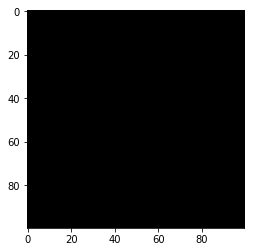

In [81]:
pinhole = point(0,0,-5)
wall_z = 10.0
wall_size = 7.0
s = sphere()
s.material.color = color(1,0.2,1)

plight = point_light(point(-10, -10, -10), color(1,1,1))

T = translation(64,64,0)
S = scaling(2,1,1)
R = rotation_z(np.pi / 4)
Sh = shearing(1,0,0,0,0,0)
tr = matrix_multiply(T,matrix_multiply(Sh,S))
set_transform(s, tr)

canvas_pixels = 100
width = canvas_pixels
height = canvas_pixels
pixel_size = wall_size / canvas_pixels
half = wall_size / 2

ca = canvas(width, height)

for y in range(height):
    world_y = half - pixel_size * y
    for x in range(width):
        world_x = -half + pixel_size * x
        r = ray(pinhole, normalize(point(world_x,world_y,wall_z) - pinhole))
        h = hit(intersect(s, r))
        if h is not None:
            pt = position(r, h.t)
            norm = normal_at(h.object, pt)
            eye = -r.direction
            c = lighting(h.object.material, plight, pt, eye, norm)
            write_pixel(ca, x, height - y, c)

print('canvas constructed')

ppm = construct_ppm(ca)
print('ppm constructed')

with open('./ppm_test_file.ppm', 'wb') as f:
    f.write(ppm)
print('ppm file written')

import PIL.Image as Image
from matplotlib.pyplot import imshow

%matplotlib inline
im = Image.open('./ppm_test_file.ppm', 'r')

imshow(im)